In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import nltk

In [2]:
data = pd.read_csv("C:\\Users\\jia\\Downloads\\datasetb2d9982\\dataset\\train.csv")

In [3]:
data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [4]:
print(len(data))

2249698


In [5]:
data = data.drop_duplicates(subset=['PRODUCT_ID'])
data = data.dropna()
print(len(data))

1038460


In [6]:
prod_len = data['PRODUCT_LENGTH'].values

In [17]:
for i in range(20):
    z_scores = np.abs((data['PRODUCT_LENGTH']-data['PRODUCT_LENGTH'].mean())/data['PRODUCT_LENGTH'].std())
    threshold=3
    data = data[z_scores<threshold]

In [18]:
df=data
# del data
print(len(df))
print(min(df['PRODUCT_LENGTH']),max(df['PRODUCT_LENGTH']))

923663
1.0 2066.0


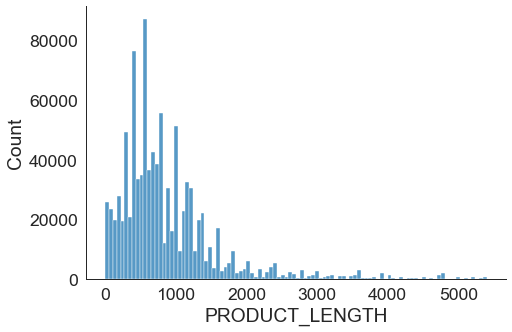

In [9]:
sns.set_style("white")
sns.set_context("paper",font_scale=2)
sns.displot(data=df,x='PRODUCT_LENGTH',kind="hist",bins=100,aspect=1.5)

In [10]:
df['PRODUCT_LENGTH'] = np.log(df['PRODUCT_LENGTH'])

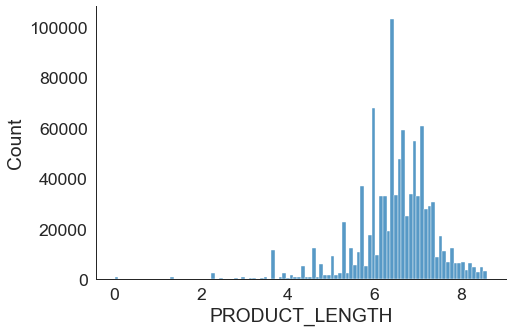

In [11]:
sns.set_style("white")
sns.set_context("paper",font_scale=2)
sns.displot(data=df,x='PRODUCT_LENGTH',kind="hist",bins=100,aspect=1.5)

In [12]:
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_text(text):
    # Convert all text to lowercase
    text = text.lower()
    
    # Remove all punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove all digits
    text = re.sub(r'\d+', '', text)
    
    # Remove all extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove all stop words (optional)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Apply the clean_text function to the DESCRIPTION column in the df DataFrame
df['DESCRIPTION'] = df['DESCRIPTION'].apply(clean_text)
df['TITLE'] = df['TITLE'].apply(clean_text)
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(clean_text)


In [14]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.stem import PorterStemmer

# initialize Porter stemmer
stemmer = PorterStemmer()

# define a function to apply stemming to a text
def apply_stemming(text):
    # tokenize text into words
    words = nltk.word_tokenize(text)
    # apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # join stemmed words into a single string
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text

# apply stemming to a column of the dataset
df['DESCRIPTION'] = df['DESCRIPTION'].apply(apply_stemming)
df['TITLE'] = df['TITLE'].apply(apply_stemming)
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(apply_stemming)


In [16]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['DESCRIPTION'] = df['DESCRIPTION'].apply(lambda x: word_tokenize(x))
df['TITLE'] = df['TITLE'].apply(lambda x: word_tokenize(x))
df['BULLET_POINTS'] = df['BULLET_POINTS'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform PRODUCT_TYPE_ID column
df['PRODUCT_TYPE_ID'] = le.fit_transform(df['PRODUCT_TYPE_ID'])


In [18]:
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,"[priknik, horn, red, electr, air, horn, compre...","[loud, dual, tone, trumpet, horn, compat, sxel...","[specif, color, red, materi, aluminium, voltag...",6411,6.617445
3,1594019,"[alishah, women, cotton, ankl, length, leg, co...","[made, cotton, lycra, give, way, stretchabl, c...","[aishah, women, lycra, cotton, ankel, leg, bra...",2663,6.668738
5,2152929,"[hin, metal, bucket, shape, plant, pot, indoor...","[simpl, eleg, great, display, indoor, plant, l...","[hin, bring, eleg, look, pot, stand, durabl, l...",5027,6.856462
7,2026580,"[delavala, self, adhes, kitchen, backsplash, w...","[high, qualiti, pvc, materi, kitchen, aluminum...","[pstrongaluminum, foil, stickersgood, kitchen,...",5269,6.891882
9,2998633,"[hexwel, essenti, oil, home, fragranc, oil, ar...","[pure, natur, essenti, oil, fragranc, oil, bot...","[transform, home, workplac, hotel, room, perso...",6982,5.975591


In [19]:
df.to_csv('stem_df.csv', index=False)

In [20]:
df.to_csv('stem_df_duplicate.csv', index=False)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()

# tfidf_matrix = vectorizer.fit_transform(df['DESCRIPTION'])

# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())

# df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCT_LENGTH']], df['PRODUCT_LENGTH'], test_size=0.2, random_state=42)

# create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# vectorize the text columns
X_train_text = tfidf_vectorizer.fit_transform(X_train[['TITLE', 'BULLET_POINTS', 'DESCRIPTION']].apply(lambda x: ' '.join(x), axis=1))
X_test_text = tfidf_vectorizer.transform(X_test[['TITLE', 'BULLET_POINTS', 'DESCRIPTION']].apply(lambda x: ' '.join(x), axis=1))

# combine the vectorized text columns and normalized PRODUCT_LENGTH into a single feature matrix
X_train = pd.concat([pd.DataFrame(X_train_text.toarray()), X_train['PRODUCT_LENGTH']], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_text.toarray()), X_test['PRODUCT_LENGTH']], axis=1)